# ROOT

Display this notebook in slidshow form by running
```
jupyter nbconvert ROOT.ipynb --to slides --post serve
```

### Starting up pyROOT

Install ROOT from [https://root.cern/install/](https://root.cern/install/)

In [1]:
import ROOT

Welcome to JupyROOT 6.28/04


## Data Processing

* ROOT is a database framework used by HEP
* Optimized for storing and processing independent *events*
* C++ library with python interface

p.s. when processing data, you should use C++ if you know it. Python is way slower, though is the better choice when plotting. We'll use python for this tutorial for simplicity. 

### Open a test file

This file is included in the git repo

In [2]:
in_file = ROOT.TFile('test.root')
in_file.ls()

TFile**		test.root	
 TFile*		test.root	
  KEY: TTree	tree;1	tree


Contains a single `TTree` called `tree`

### TTrees

* The main data storage class in ROOT is the TTree
* Can think of as a table
* Each column (TBranch) stores some data type
* Each row (entry) represents one event

| Entry | Animal | Legs |
| :-- | :-- | :-- |
| 0 | Whale | 0 |
| 1 | Human | 2 |
| 2 | Dog | 4 |

In [3]:
tree = in_file.Get('tree')
tree.GetEntries()

156

### TTrees (2)

List contents of tree:

In [ ]:
tree.Print()

```
******************************************************************************
*Tree    :tree      : tree                                                   *
*Entries :      156 : Total =           30015 bytes  File  Size =      17696 *
*        :          : Tree compression factor =   1.08                       *
******************************************************************************
*Br    0 :sample    : string                                                 *
*Entries :      156 : Total  Size=       1666 bytes  File Size  =        392 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   2.99     *
*............................................................................*
*Br    1 :weight    : weight/F                                               *
*Entries :      156 : Total  Size=       1186 bytes  File Size  =        690 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.01     *
*............................................................................*
```

### TTrees (3)

Loop over tree contents:

In [5]:
for entry,event in enumerate(tree):
    if entry >= 5: break
    print(entry, event.sample, event.weight)

0 WW 0.15749430656433105
1 WW 0.1984470635652542
2 WW 0.14358942210674286
3 WW 0.22988080978393555
4 WW 0.23132875561714172


### Exercise 1

* Note the branch `truth_lep1_pdgId`
* This is the pdgId of a lepton in each event (11 = e, 13 = mu, 15 = tau)
* Count the number of occurences of each lepton

In [6]:
# fill me!

* Answer: 74 electron, 75 muon, 7 tau

### Exercise 2

* Write a function that returns the mass of the `lep1`. Take `event` as an argument.
* Use the function to print the entry number and the mass for the 7 tau events.
* Hint 1: Create a [TLorentzVector](https://root.cern.ch/doc/master/classTLorentzVector.html) with `ROOT.TLorentzVector(px, py, pz, e)`
* Hint 2: Search the documentation for how to retrieve the mass

In [7]:
def truth_lep1_mass(event):
    '''
    Gets the mass of 'truth_lep1' from an event in our test file.
    '''
    pass # TODO

# implement me!

Optional advanced exercise: generalize the function to any of the objects in the file

Answer: 
```
10 1.777402522020421
50 1.7730776138898674
56 1.777790404945941
105 1.7773254352322867
116 1.777033892011321
127 1.7769968885935143
132 1.7777922133134614
```

Advanced exercise solution:

In [8]:
def mass(event, object):
    '''
    Gets the mass of an object from an event in our test file.
    @param object 
        The object name prefix, like 'truth_lep1'.
    '''
    par_names = ['px', 'py', 'pz', 'e']
    pars = [getattr(event, f'{object}_{x}') for x in par_names]
    v = ROOT.TLorentzVector(*pars)
    return v.M()

### Exercise 3

* Copy and edit the advanced solution to return the entire `TLorentzVector`
* Create vectors for each `truth_q1` and `truth_q2`
* Add them together (just use the plus sign `v_vhad = v_q1 + v_q2`)
* Print out the mass of the sum for the first 5 events

In [13]:
# implement me!

Answer:
```
0 81.32034253609
1 80.9839953325698
2 73.01083275667166
3 75.12670548627572
4 79.40726336910527
```

### Histograms

* Main result of HEP analysis is histograms
* Histograms count the number of events in **bins**
* From the Higgs discovery [paper](https://cds.cern.ch/record/1471031):

<img src="img/higgs.png" style="height: 400px;">

### Histograms (2)

ROOT has a [TH1D](https://root.cern.ch/doc/master/classTH1.html) class for 1D histograms

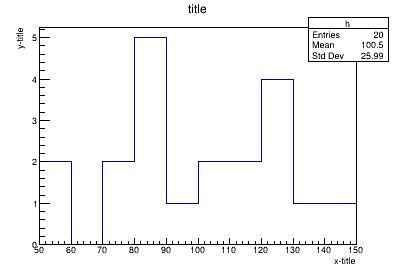

In [43]:
import random

hist = ROOT.TH1D('h', 'title;x-title;y-title', 10, 50, 150)
for i in range(20):
    hist.Fill(random.randrange(50, 150), 1)

canvas = ROOT.TCanvas('c1', '', 400, 300)
hist.Draw()
canvas.Draw()

### Exercise 4

* Create a histogram with 10 bins between 50 and 150
* Fill the histogram with the mass of `v_vhad` from exercise 3 for each event
* Use the `weight` branch in the `TTree` as the weight in `Fill`

In [ ]:
h_vhad_m = # TODO

# TODO fill h_vhad_m

canvas = ROOT.TCanvas('c1', '', 400, 300)
h_vhad_m.Draw()
canvas.Draw()

### ROOT in C++

* Python makes reading ROOT easy, but really slow!
* Two recommended ways: [TTreeReader](https://root.cern.ch/doc/master/classTTreeReader.html) and [RDataFrame](https://root.cern.ch/doc/master/classROOT_1_1RDataFrame.html)
  * TTreeReader reads like in python, event by event
  * RDataFrame processes entire dataset at once, harder but much faster (see slides in repo)
  * DON'T use legacy `SetBranchAddress` method if you come across it
* Many tutorials on the web (e.g. [1](https://twiki.cern.ch/twiki/pub/Main/ROOTRioTutorial/ROOT_Rio2015_Part1.pdf), [2](https://indico.cern.ch/event/402660/sessions/162368/attachments/1188610/1724528/ROOT_Rio2015_Part2.pdf))
* ROOT also has many useful features for HEP like `TLorentzVector`


## Plotting

* ROOT is useful for plotting too!
* This is best done in python since we don't care about speed

### Plot Basics

* First create a `TCanvas` to host the plot
* Calling `hist.Draw(opt)` will draw the histogram on the "current" canvas (yuk side-effects)
* Modify color and style attributes on the histogram though! (yuk #2)
* See [THistPainter](https://root.cern/doc/master/classTHistPainter.html) for drawing options, [TAttLine](https://root.cern.ch/doc/master/classTAttLine.html) [TAttMarker](https://root.cern.ch/doc/master/classTAttMarker.html) for histogram options
* Use `canvas.Draw()` to display and `canvas.Print('out.png')` to save the image

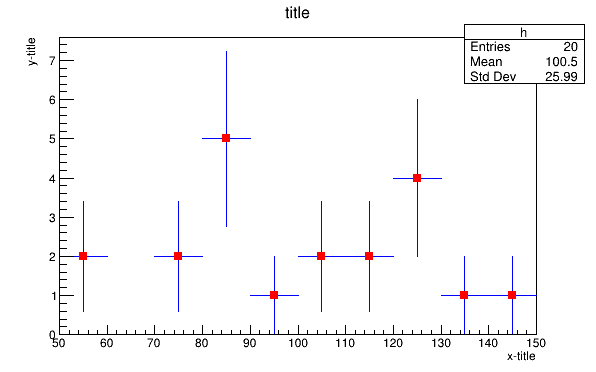

In [44]:
canvas = ROOT.TCanvas('c1', '', 600, 400)
hist.SetLineColor(ROOT.kBlue)
hist.SetMarkerStyle(ROOT.kFullSquare)
hist.SetMarkerColor(ROOT.kRed)
hist.Draw('PE')
canvas.Draw()

### Plot Basics (2)

* You can overlay multiple histograms with the 'SAME' plotting option
* yuk #3: the first histogram defines the axes ranges and titles

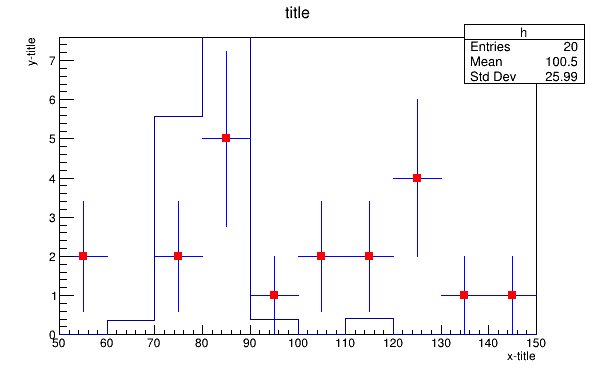

In [45]:
h_vhad_m.Draw('SAME HIST')
canvas.Draw()

### Exercise 5

* Create histograms for the px of `lep1`, `lep2`, `q1`, and `q2` (20 bins between -200 and 200)
* Draw the lepton histos as solid lines in black and blue
* In the same canvas, draw the quarks with markers and error bars in red and green

### Plot Extras

* You can add lots of things to plots
  * Extra pads
  * Legends
  * Imposed text
* ROOT's API really sucks for a lot of this though
* Thankfully a jaded grad student has tried to make it easier


### Declarative Plot Tools

* Can consider using my declarative plotting functions [here](https://github.com/riley-x/ROOT_Plotting_Tools/tree/main)
* Make sure submodules are checked out with `git submodule update --init --recursive`

In [85]:
import ROOT_Plotting_Tools.plot as rp

def plot():
    canvas = ROOT.TCanvas('c1', '', 800, 600)
    canvas.UseCurrentStyle() # this is only needed cause we imported 
                        # the module after creating the histograms
    _cache = rp._plot(canvas, [hist, h_vhad_m],
        textpos='topright',
        subtitle='Example plot',
        legend=['random', 'vhad'],
        xtitle='mass [GeV]',
        ytitle='Events',
        yrange=[0, None],
        linecolor=rp.colors.tableu,
        markerstyle=0,
        opts=['HIST', 'PE'],
    )
    canvas.Draw()

    return _cache # Do not let python garbage collect plot objects 

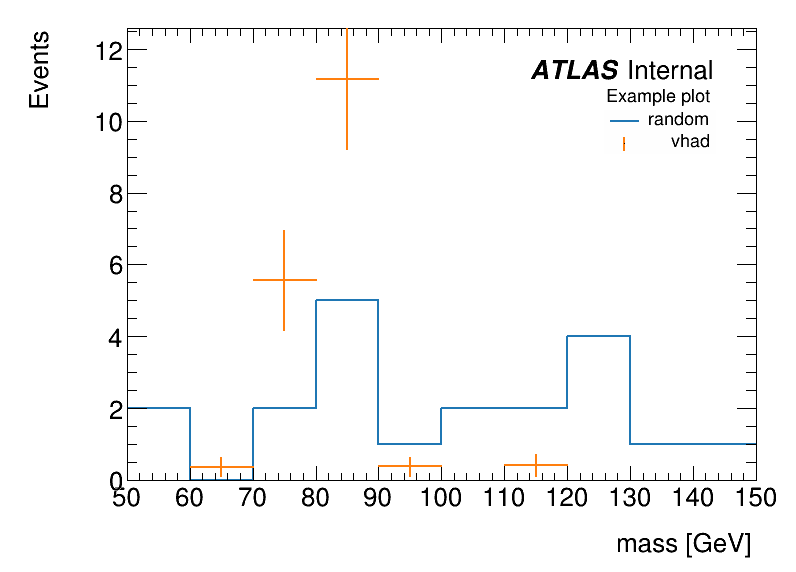

In [86]:
_cache = plot()

### Afterword

* ROOT is powerful but old and messy
* Recommend do NOT use ROOT in Jupyter outside of testing (side-effects are bad!)
* Ask questions! ROOT forum, ROOT documentation, and google are all helpful too